In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import xarray as xr

In [133]:
pset_1 = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/2011/PGS_spacetime_001.zarr')

In [135]:
pset_1

<xarray.Dataset> Size: 81MB
Dimensions:     (trajectory: 6960, obs: 364)
Coordinates:
  * obs         (obs) int32 1kB 0 1 2 3 4 5 6 7 ... 357 358 359 360 361 362 363
  * trajectory  (trajectory) int64 56kB 60 61 62 63 64 ... 7016 7017 7018 7019
Data variables:
    lat         (trajectory, obs) float64 20MB dask.array<chunksize=(6960, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 20MB dask.array<chunksize=(6960, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 20MB dask.array<chunksize=(6960, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 20MB dask.array<chunksize=(6960, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4_3DKeepInOcean
    parcels_mesh:           spherical
    parcels_version:        3.0.2

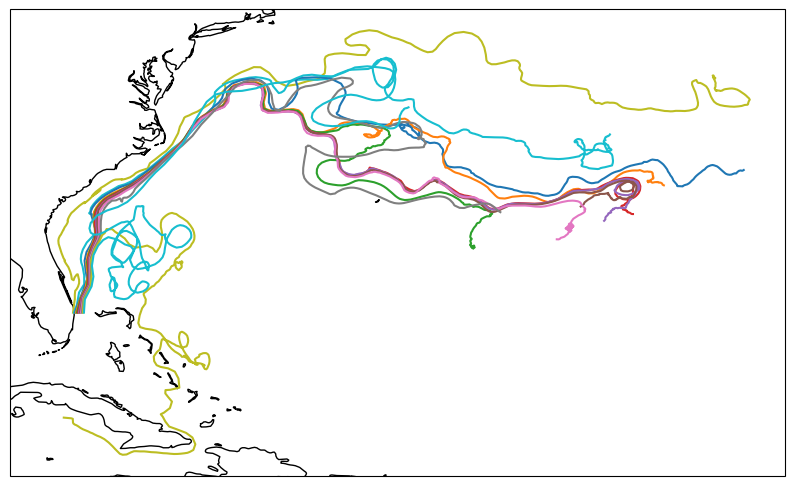

In [144]:
# plot the first 45 particles with land from cartopy
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
# ax.set_extent([-180, 180, -90, 90])

for i in range(40):
    plt.plot(pset_1.lon[i, :], pset_1.lat[i, :])
    
    

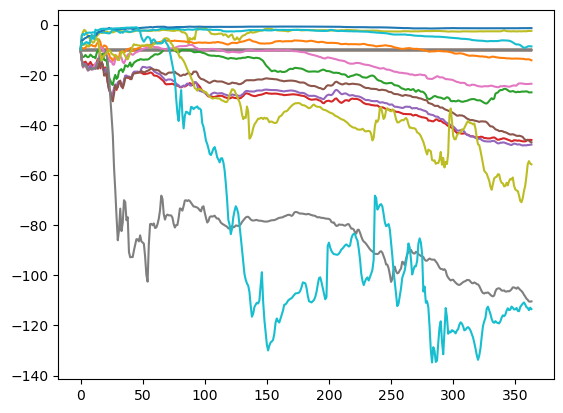

In [202]:
for i in range(40):
    plt.plot(-pset_1.z[i, :])

In [24]:
# Bin the particles into hexagons
# Define the resolution of the binning
res = 7
# Create a list of hexagons
hexagons = []
# Loop through the particles
for i in range(40):
    # Loop through the time steps
    for j in range(0, 10):
        # Get the coordinates of the particle
        lon = pset_1.lon[i, j]
        lat = pset_1.lat[i, j]
        # Convert the coordinates to a hexagon
        hexagon = geo_to_h3(lat, lon, res)
        # Append the hexagon to the list
        hexagons.append(hexagon)

In [25]:
hexagons

['8744136b0ffffff',
 '8744136b0ffffff',
 '8744136b0ffffff',
 '8744136b0ffffff',
 '8744136b0ffffff',
 '8744136b0ffffff',
 '8744136b0ffffff',
 '8744136b0ffffff',
 '8744136b0ffffff',
 '8744136b0ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb48ffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744acb5dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2dffffff',
 '8744aca2affffff',
 '8744aca2affffff',
 '8744aca2affffff',
 '8744aca2affffff',
 '8744aca2affffff',
 '8744aca2affffff',
 '8744aca2affffff',
 '8744aca2affffff',
 '8744aca2affffff',
 '8744aca2affffff',


# Initial conditions

In [4]:
dx, dz = 0.05, 20

X = np.arange(-81.5, -78.5, dx)
Y = 26.7*np.ones(X.shape)
Z = np.ones(X.shape)

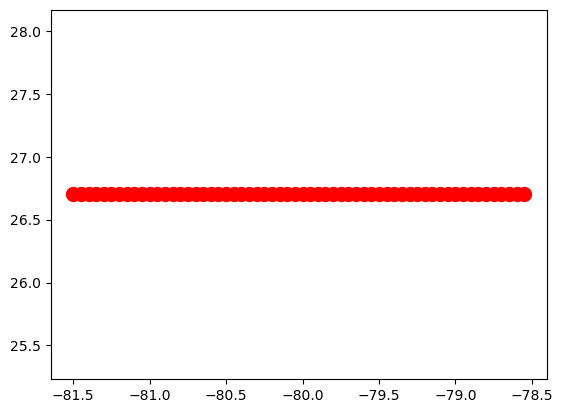

In [5]:
plt.scatter(X, Y, c='r', s=100)

In [14]:
mesh_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/coordinates_NATL025_v2.nc'
mask_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/NATL025-CJMenobs01_byte_mask.nc'

mesh = xr.open_dataset(mesh_file, decode_times=False)
mask = xr.open_dataset(mask_file, decode_times=False)

field = xr.open_dataset('/storage/shared/oceanparcels/input_data/NEMO_Ensemble/NATL025-CJMCYC3.023-S/1d/2011/NATL025-CJMCYC3.023_y2011m01.1d_gridV.nc')

In [34]:
field

<xarray.Dataset> Size: 2GB
Dimensions:               (depthv: 46, y: 530, x: 486, time_counter: 31,
                           axis_nbounds: 2)
Coordinates:
  * depthv                (depthv) float32 184B 3.047 9.454 ... 5.875e+03
    nav_lat               (y, x) float32 1MB ...
    nav_lon               (y, x) float32 1MB ...
    time_centered         (time_counter) datetime64[ns] 248B ...
  * time_counter          (time_counter) datetime64[ns] 248B 2011-01-01T12:00...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    sometauy              (time_counter, y, x) float32 32MB ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 496B ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 496B ...
    vomecrty              (time_counter, depthv, y, x) float32 1GB ...
Attributes:
    description:       ocean V grid variables
    title:             ocean V grid variables
    Conventions:       CF-1.5
    production:        An IPSL model
    start_date:        19830101
    output_frequency:  1d
    CONFIG:            NATL025
    CASE:              CJMCYC3.023
    history:           Sun Aug 19 09:14:08 2018: ncks -O -F -d time_counter,1...
    NCO:               4.1.0

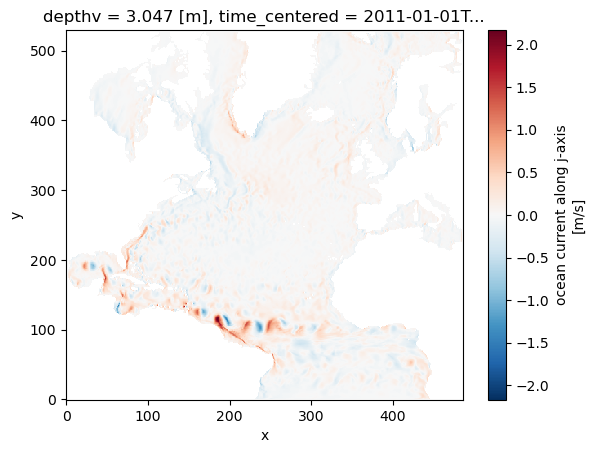

In [17]:
field['vomecrty'][0,0,:,:].plot()

In [13]:
lons = mesh['nav_lon'].shape
lats = mesh['nav_lat'].shape



(530, 486)
(530, 486)


/tmp/ipykernel_8213/2645518184.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][0,depth,:,:], cmap='viridis')
/tmp/ipykernel_8213/2645518184.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], mask['tmask'][0,depth,:,:], cmap='gray', alpha=0.5)


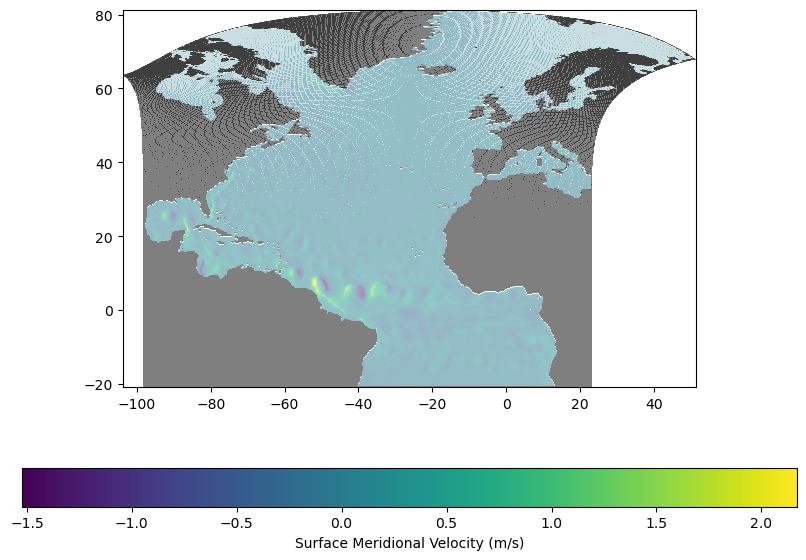

In [78]:
# plot field with pcolor mesh and add land mask 
depth = 0
fig, ax = plt.subplots(figsize=(10, 7))
im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][0,depth,:,:], cmap='viridis')
ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], mask['tmask'][0,depth,:,:], cmap='gray', alpha=0.5)
# ax.set_xlim([-80, -78])
# ax.set_ylim([26, 28])
ax.set_aspect('equal')
fig.colorbar(im, ax=ax, label='Surface Meridional Velocity (m/s)', orientation='horizontal')


/tmp/ipykernel_8213/3186540159.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][time,depth,:,:], cmap='viridis')
/tmp/ipykernel_8213/3186540159.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='gray', alpha=0.5)


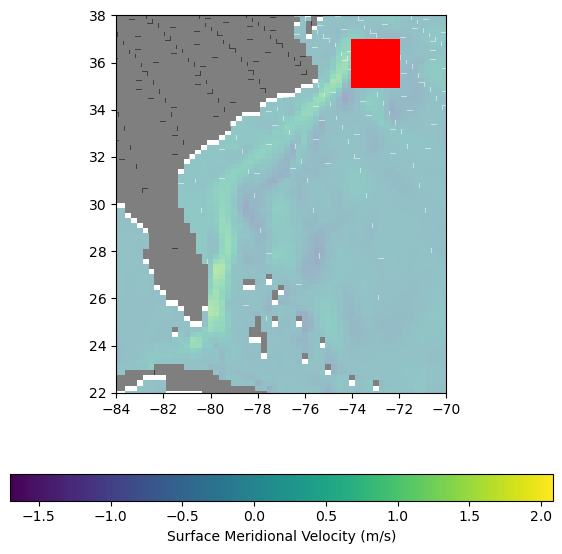

In [204]:
time = 5
depth = 0
fig, ax = plt.subplots(figsize=(7, 7))

im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][time,depth,:,:], cmap='viridis')
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='gray', alpha=0.5)

ax.set_xlim([-84, -70])
ax.set_ylim([22, 38])
ax.set_aspect('equal')
fig.colorbar(im, ax=ax, label='Surface Meridional Velocity (m/s)', orientation='horizontal')


step=1/32.
min_lon = -74
max_lon = -72
min_lat = 35
max_lat = 37
min_depth = 0
max_depth = 1500
z_step = 100
p_lons, p_lats, p_depths = np.meshgrid(np.arange(min_lon, max_lon, step), 
                         np.arange(min_lat, max_lat, step),
                         np.arange(min_depth, max_depth, z_step))
ax.scatter(p_lons, p_lats, c='r', s=1)


In [208]:
len(p_lons.flatten())

61440

In [177]:
field['depthv'][26]

<xarray.DataArray 'depthv' ()> Size: 4B
array(1470.893, dtype=float32)
Coordinates:
    depthv   float32 4B 1.471e+03
Attributes:
    long_name:  Vertical V levels
    units:      m
    axis:       Z
    positive:   down

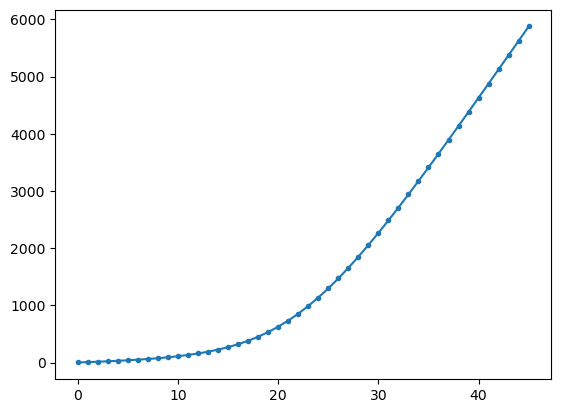

In [171]:
plt.plot(field['depthv'], '.-')

In [114]:
p_lons[::5, ::5].shape

(26, 26)

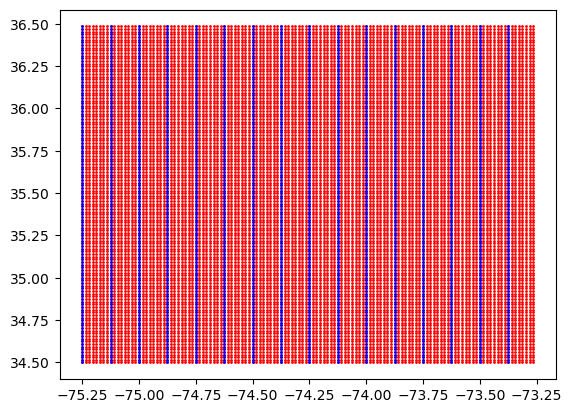

In [141]:
step=1/64.
min_lon = -75.25
max_lon = -73.25
min_lat = 34.5
max_lat = 36.5

p_lons, p_lats = np.meshgrid(np.arange(min_lon, max_lon, step), 
                         np.arange(min_lat, max_lat, step))
plt.scatter(p_lons, p_lats, c='r', s=1)
# select particles skiping 1 every 10

p_lons = p_lons.flatten()
p_lats = p_lats.flatten()

n = 8
plt.scatter(p_lons[::n], p_lats[::n], c='b', s=1)

In [104]:
1/32

3.125

In [143]:
len(p_lons.flatten())

4096

/tmp/ipykernel_8213/129703574.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][0,0,:,:], cmap='viridis')
/tmp/ipykernel_8213/129703574.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], mask['tmask'][0,0,:,:], cmap='gray', alpha=0.5)


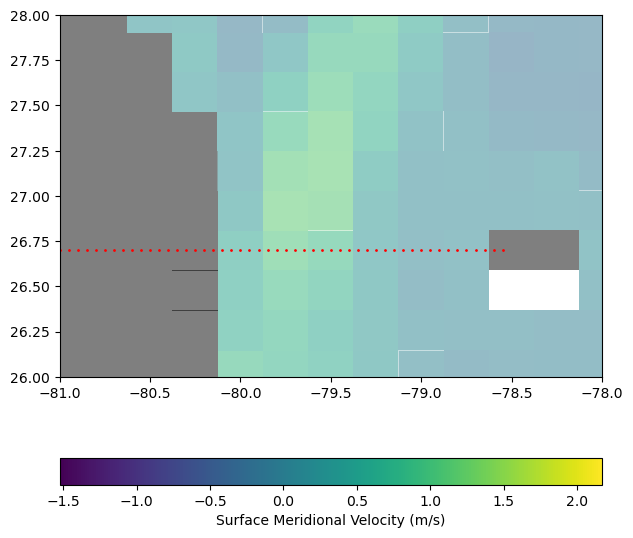

In [54]:
# plot field with pcolor mesh and add land mask 
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][0,0,:,:], cmap='viridis')
ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], mask['tmask'][0,0,:,:], cmap='gray', alpha=0.5)
ax.scatter(X, Y, c='r', s=1)

ax.set_xlim([-81, -78])
ax.set_ylim([26, 28])
ax.set_aspect('equal')
fig.colorbar(im, ax=ax, label='Surface Meridional Velocity (m/s)', orientation='horizontal')



In [162]:
1/32*100000 / 1 /(60*60)

0.8680555555555556